# APPROACH

---




* Load all lib and datas
* Data preparation and data transformation
* View images
* Model
     - Neural network(mlp,dense,fcn)
     -Sklearn
     -tensor flow



# IMPORTING THE LIBRARIES

---



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# LOADING AND AUDITING THE DATA

---



**TRAIN DATA**

In [ ]:
train_data=pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(60000, 785)

**TEST DATA**

In [ ]:
test_data=pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
test_data.shape

(10000, 785)

# TRAIN AND TEST DATA SPLITTING

---



In [ ]:
x=train_data.iloc[:,1:]
y=train_data['label']


In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


# BUILDING MODEL

---



## SINGLE LAYER PERCEPTRON

In [ ]:
slp=Perceptron(verbose=1)
slp.fit(x_train,y_train)
preds_slp_train=slp.predict(x_train)
preds_slp_test=slp.predict(x_test)

-- Epoch 1
Norm: 53717.69, NNZs: 783, Bias: -79.000000, T: 48000, Avg. loss: 300315.256500
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 62354.58, NNZs: 784, Bias: -140.000000, T: 96000, Avg. loss: 297111.988625
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 71210.45, NNZs: 784, Bias: -199.000000, T: 144000, Avg. loss: 286966.761063
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 77926.15, NNZs: 783, Bias: -280.000000, T: 192000, Avg. loss: 294703.786187
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 85439.47, NNZs: 784, Bias: -372.000000, T: 240000, Avg. loss: 294710.997146
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 91029.39, NNZs: 784, Bias: -435.000000, T: 288000, Avg. loss: 287022.618167
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 94805.77, NNZs: 784, Bias: -494.000000, T: 336000, Avg. loss: 287587.723562
Total training time: 0.65 seconds.
-- Epoch 8
Norm: 99334.58, NNZs: 784, Bias: -596.000000, T: 384000, Avg. loss: 288378.091500
Total training

In [ ]:
def model_eval(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print("Accuracy :",round(acc_score,2))
  print(" ")
  print(cm_matrix)
  print(" ")
  print(clas_rep)

In [ ]:
model_eval(y_train,preds_slp_train)

Accuracy : 0.83
 
[[4178   12  119  189   97    0  198    0   67    0]
 [  12 4590   23   90   39    0    2    0    3    0]
 [  62    5 3497   60 1076    0   54    0   34    0]
 [ 167   45   48 4214  327    0   31    2   16    1]
 [  13    4  248  105 4426    0   40    1   13    0]
 [  27    3   42   12   16 3775    9  638  134  120]
 [ 769    9  731  191 1471    0 1513    1  106    1]
 [   0    0    1    0    0   13    0 4680   18   61]
 [  18    1   48   52   80    2   17   22 4533    3]
 [   7    2    5    1    2   26    1  339    9 4383]]
 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4860
           1       0.98      0.96      0.97      4759
           2       0.73      0.73      0.73      4788
           3       0.86      0.87      0.86      4851
           4       0.59      0.91      0.71      4850
           5       0.99      0.79      0.88      4776
           6       0.81      0.32      0.45      4792
           7    

**INFERENCE**

* TRAIN ACCURACY =0.83

In [ ]:
model_eval(y_test,preds_slp_test)

Accuracy : 0.81
 
[[ 968    5   29   51   23    1   48    1   14    0]
 [   5 1176   11   32   13    0    1    0    2    1]
 [   8    1  872   21  279    0   21    0   10    0]
 [  55   14   17  958   92    0    7    1    4    1]
 [   4    1   71   35 1020    0   16    0    3    0]
 [   5    1   14    1    4  936    5  181   41   36]
 [ 207    1  199   41  382    0  341    1   35    1]
 [   0    0    0    0    0    3    0 1204    1   19]
 [   3    0    6   20   22    1    7   10 1155    0]
 [   7    0    1    1    0    8    0  104    2 1102]]
 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1140
           1       0.98      0.95      0.96      1241
           2       0.71      0.72      0.72      1212
           3       0.83      0.83      0.83      1149
           4       0.56      0.89      0.68      1150
           5       0.99      0.76      0.86      1224
           6       0.76      0.28      0.41      1208
           7    

**INFERENCE**

* TEST_ACCURACY=0.81

## MULTILAYER PERCEPTRON

---



In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(128,128,128),verbose=1,max_iter=250)

In [ ]:
mlp.fit(x_train,y_train)
preds_mlp_train=mlp.predict(x_train)
preds_mlp_test=mlp.predict(x_test)

Iteration 1, loss = 2.53404323
Iteration 2, loss = 0.75304009
Iteration 3, loss = 0.56216778
Iteration 4, loss = 0.48972986
Iteration 5, loss = 0.43547526
Iteration 6, loss = 0.39328259
Iteration 7, loss = 0.38157588
Iteration 8, loss = 0.35679036
Iteration 9, loss = 0.34481709
Iteration 10, loss = 0.34863870
Iteration 11, loss = 0.32890795
Iteration 12, loss = 0.32310020
Iteration 13, loss = 0.31213367
Iteration 14, loss = 0.30777674
Iteration 15, loss = 0.31104530
Iteration 16, loss = 0.30468497
Iteration 17, loss = 0.29485755
Iteration 18, loss = 0.29336908
Iteration 19, loss = 0.29085002
Iteration 20, loss = 0.29309512
Iteration 21, loss = 0.29109309
Iteration 22, loss = 0.27290077
Iteration 23, loss = 0.26990908
Iteration 24, loss = 0.27029084
Iteration 25, loss = 0.26338999
Iteration 26, loss = 0.26286662
Iteration 27, loss = 0.26176132
Iteration 28, loss = 0.25807350
Iteration 29, loss = 0.25883680
Iteration 30, loss = 0.25029555
Iteration 31, loss = 0.25256983
Iteration 32, los

**INFERENCE:**

* BY PROVIDING THE HIDDEN LAYER SIZES AS (128,128,128)

* WE CAN SEE THERE IS AROUND 145 ITERATIONS WITH LOSS=0.085.

* ALSO WE CAN WITNESS THAT THE TRAINING LOSS DID  NOT IMPROVE MORE THAN TOLEARANCE LEVEL(i.e) tol=0.0001 .

* SO THE ITERATION WAS STOPPED BRFORE EXECUTING THE GIVEN MAX_ITER=250.

In [ ]:
model_eval(y_train,preds_mlp_train)


Accuracy : 0.98
 
[[4625    0   13   34    3    0  183    0    2    0]
 [   0 4747    0    9    2    0    1    0    0    0]
 [   6    0 4491   10  212    0   67    0    2    0]
 [   4    1    6 4789   46    1    4    0    0    0]
 [   2    0   95   41 4657    0   53    0    2    0]
 [   0    0    0    0    0 4776    0    0    0    0]
 [ 118    0   93   36  110    0 4435    0    0    0]
 [   0    0    0    0    0    2    0 4767    1    3]
 [   1    0    0    2    1    0    0    0 4772    0]
 [   0    0    0    0    0    1    0   22    0 4752]]
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4860
           1       1.00      1.00      1.00      4759
           2       0.96      0.94      0.95      4788
           3       0.97      0.99      0.98      4851
           4       0.93      0.96      0.94      4850
           5       1.00      1.00      1.00      4776
           6       0.94      0.93      0.93      4792
           7    

**INFERENCE**



*   THE TRAIN ACCURACY = 0.98.
*   WE CAN CLEARLY SEE  WHICH LABEL CAN BE MORE DIFFICULT TO BE DIFFERENCIATED FROM THE OTHER LABELS.
* THIS CAN BE ACHIEVED BY CALCULATING THE f1 SCORES .
* FROM THE ABOVE LABELS, WE CAN SAY THAT LABEL 6 AND 4 MAY BE QUITE COMPLEX.



In [ ]:
model_eval(y_test,preds_mlp_test)

Accuracy : 0.89
 
[[ 919    0   20   48    4    0  144    0    5    0]
 [   2 1210    1   24    1    0    1    0    2    0]
 [  10    0  966   21  118    0   93    0    4    0]
 [  16   11    7 1030   52    0   31    0    1    1]
 [   5    2   85   35  959    0   58    0    6    0]
 [   1    0    0    0    0 1174    1   25    8   15]
 [ 121    3  103   29   81    0  860    0   11    0]
 [   0    0    0    0    0   20    2 1160    4   41]
 [   6    0    2    6    7    2    9    1 1190    1]
 [   0    0    0    1    0    6    0   48    1 1169]]
 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1140
           1       0.99      0.98      0.98      1241
           2       0.82      0.80      0.81      1212
           3       0.86      0.90      0.88      1149
           4       0.78      0.83      0.81      1150
           5       0.98      0.96      0.97      1224
           6       0.72      0.71      0.71      1208
           7    

*   THE TEST ACCURACY = 0.89.
*   WE CAN CLEARLY SEE  WHICH LABEL CAN BE MORE DIFFICULT TO BE DIFFERENCIATED FROM THE OTHER LABELS.
* THIS CAN BE ACHIEVED BY CALCULATING THE f1 SCORES .
* FROM THE ABOVE LABELS, WE CAN SAY THAT LABEL 6,4 AND 2 MAY BE QUITE COMPLEX.


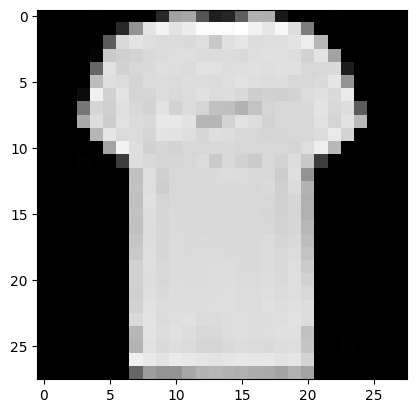

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1,785)]
rows_to_examine = 10from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
image_data = np.reshape(train_data[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')